## **Maestría en Analítica de Datos.**

>>**Facultad de Ingeniería y Ciencias Básicas.**
>* **PROCESAMIENTO DE LENGUAJE NATURAL.**

> > Presentado por: 
* Honorato Antonio Coronado Ricardo 
* David Villabon
* Juan Carlos Riaño
    
>**Tema:**

>>**RESUMEN EXTRACTIVO APLICADO A TEXTOS EN FORMATO HTML.**

>* **Libreria Inscriptis** :
>> Utilizamos  biblioteca **INSCRIPTIS** para realizar la conversión de HTML a texto basada en Python, un cliente de línea de comandos y un servicio web con soporte para tablas anidadas.

In [104]:
!pip install inscriptis
!pip install googletrans==3.1.0a0
!pip install unidecode
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



>**Libreria GOOGLETRANS**
>> Googletrans es una biblioteca de python gratuita e ilimitada que implementó la API de Google Translate para realizar llamadas a métodos tales como detectar y traducir.



In [105]:
!pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Librerias utilizadas**
* **HEAP    :** También conocido como algoritmo de cola con prioridad, son árboles binarios para los cuales cada nodo padre tiene un valor menor o igual que cualquiera de sus hijos.
* **NLTK     :**
* **BS4      :** Es una biblioteca de Python para extraer datos de archivos HTML y XML. Funciona con su analizador favorito para proporcionar formas idiomáticas de navegar, buscar y modificar el árbol de análisis. Comúnmente ahorra a los programadores horas o días de trabajo.
* **URLLIB   :** Es un módulo Python para acceder y utilizar recursos de internet identificados por URLs (Uniform Resource Locators).
* **RE       :** Este módulo proporciona operaciones de coincidencia de expresiones regulares
* **REQUEST  :** Es el estándar de facto para realizar solicitudes HTTP en Python.
* **UNICODE  :** Utilizada para remover la acentuacion de los textos a procesar.
* **AUTOCORRECT  :** Nos ayuda a corregir al mal tipeo de las palabra en los textos utilizando la distancia de Levenshtein. 


In [106]:
import heapq
import nltk
import bs4 as bs
import urllib.request
import re
import requests
from bs4 import BeautifulSoup
from inscriptis import get_text
from googletrans import Translator
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**WEB SCRAPING**
>>Leemos textos de páginas web del sitio web de WIKIPEDIA para obtener información y almacenarla, de forma comparable al proceso automático de copiado y pegado. En este caso se excluyen las imagenes que contenga la pagina web.

In [107]:

enlace="https://fr.wikipedia.org/wiki/Franc-ma%C3%A7onnerie_sous_la_Troisi%C3%A8me_R%C3%A9publique"
html=urllib.request.urlopen(enlace).read().decode('utf-8')
text=get_text(html)
article_text=text
article_text=article_text.replace("[ edit ]", "")


In [108]:
from nltk import word_tokenize,sent_tokenize
#Removemos y limpiamos caracteres, signos, tildes, espacios extra
article_text=re.sub(r'\[[0-9]*\]', ' ', article_text)
article_text=re.sub(r'\s+', ' ', article_text)
formatted_article_text=re.sub('[^a-zA-Z]', ' ', article_text)
formatted_article_text=re.sub(r'\s+', ' ', formatted_article_text)

In [109]:
#Realiza la Tokenizacion
sentence_list =  nltk.sent_tokenize(article_text)

In [110]:
#Encuentra la frecuencia de cada palabra
stopwords=nltk.corpus.stopwords.words('spanish')
word_frequencies={}
for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1
maximun_frequncy=max(word_frequencies.values())
for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximun_frequncy)
maximun_frequncy
word_frequencies

{'Aller': 0.0020833333333333333,
 'au': 0.16458333333333333,
 'contenu': 0.0020833333333333333,
 'Afficher': 0.014583333333333334,
 'masquer': 0.014583333333333334,
 'barre': 0.0020833333333333333,
 'lat': 0.0020833333333333333,
 'rale': 0.01875,
 'Rechercher': 0.0020833333333333333,
 'Cr': 0.010416666666666666,
 'er': 0.014583333333333334,
 'compte': 0.0125,
 'Outils': 0.004166666666666667,
 'personnels': 0.008333333333333333,
 'Se': 0.0020833333333333333,
 'connecter': 0.0020833333333333333,
 'Pages': 0.00625,
 'pour': 0.20208333333333334,
 'contributeurs': 0.0020833333333333333,
 'd': 0.8416666666666667,
 'connect': 0.0020833333333333333,
 's': 0.5416666666666666,
 'savoir': 0.008333333333333333,
 'plus': 0.08125,
 'Discussion': 0.004166666666666667,
 'Contributions': 0.0020833333333333333,
 'Article': 0.01875,
 'fran': 0.11666666666666667,
 'ais': 0.01875,
 'Lire': 0.004166666666666667,
 'Modifier': 0.008333333333333333,
 'code': 0.08333333333333333,
 'Voir': 0.004166666666666667,


In [111]:
#calcular las frases que mas se repiten y selecionan las palabras con mayor valor
sentence_scores={}
for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]
sentence_scores

{"* Andrée Prat et Colette Loubatière, L'ordre maçonnique le Droit Humain , Paris, PUF , coll.": 1.0416666666666667,
 '* Autres références 1.': 0.016666666666666666,
 "* Droit d'auteur : les textes sont disponibles sous licence Creative Commons attribution, partage dans les mêmes conditions ; d’autres conditions peuvent s’appliquer.": 2.033333333333333,
 '* Emmanuel Pierrat et Laurent Kupferman, Ce que la République doit aux francs-maçons , Paris , Éditions First, 2020 , 298 p. (ISBN 978-2-412-05466-6 ) .': 1.15625,
 '* Emmanuel Pierrat et Laurent Kupferman, Ce que la République doit aux francs-maçons, 2020.': 1.15625,
 '* Julien Rycx, La franc-maçonnerie et la crise boulangiste : 1886-1891 , Éditions du Septentrion , 2019 , 232 p. (ISBN 978-2-7574-2855-9 ) .': 1.4874999999999998,
 '* Julien Rycx, La franc-maçonnerie et la crise boulangiste : 1886-1891, 2019 1.': 1.025,
 '* Marie-France Picard, La Grande Loge féminine de France , Paris, PUF , coll.': 0.1,
 '* Paul Naudon , La franc-maç

In [112]:
#Realiza el resumen con las mejores frases
summary_sentences=heapq.nlargest(7,sentence_scores,key=sentence_scores.get)
summary=' '.join(summary_sentences)
print(summary)


Le thème du combat pour le progrès, qui s’inscrit dans cette tradition et qui s'installe dans les années libérales du Second Empire, devient apparent dès 1848. Jean-Baptiste Bienvenu-Martin, ministre de l’Instruction publique du cabinet Rouvier et franc-maçon de la loge « La Clémente Amitié » , tranche le lien qui relie l'Église et l'État (1905). Georges Martin, porté par ses convictions humanistes et féministes, continue de réclamer et d'argumenter pour une initiation égalitaire des femmes dans la franc-maçonnerie. Le premier d'ordre philosophique est une traduction du terme de « lumière » qui symbolise l'instruction et la connaissance, source de discernement et dont découle une pensée indépendante. La sensibilité pacifiste, qui renaît et se déploie dans de multiples couches sociales et dans toute l'Europe à la fin du conflit, pénètre de nouveau les loges maçonniques. Le convent de 1905 valide l'action du secrétariat et de la présidence dans l’affaire des fiches [ M 65 ] . Le constat 

In [113]:
#traducir cualquier idioma al español
from googletrans import Translator
translator = Translator()
translate=translator.translate(summary , dest ='es').text 
type(translate)
for frase in range(len(translate.split(","))):
  print(translate.split(",")[frase])

El tema de la lucha por el progreso
 que forma parte de esta tradición y que se asienta en los años liberales del Segundo Imperio
 se hace evidente a partir de 1848. Jean-Baptiste Bienvenu-Martin
 Ministro de Instrucción Pública en el gabinete de Rouvier y masón del La logia "La Clémente Amitié"
 cortó el vínculo entre la Iglesia y el Estado (1905). Georges Martin
 impulsado por sus convicciones humanistas y feministas
 sigue reclamando y defendiendo una iniciación igualitaria de las mujeres en la masonería. El primero de carácter filosófico es una traducción del término "luz" que simboliza la instrucción y el conocimiento
 fuente de discernimiento y de la que emana el pensamiento independiente. La sensibilidad pacifista
 que renace y se despliega en múltiples estratos sociales y en toda Europa al final del conflicto
 vuelve a calar en las logias masónicas. El convento de 1905 valida la actuación del secretariado y la presidencia en el expediente empresarial [M 65]. La constatación de 

In [114]:
# Realiza el resumen con las mejores frases
summary_sentences1 = heapq.nlargest(15,sentence_scores,key=sentence_scores.get)
summary1 = ' '.join(summary_sentences1)
print(summary1)

Le thème du combat pour le progrès, qui s’inscrit dans cette tradition et qui s'installe dans les années libérales du Second Empire, devient apparent dès 1848. Jean-Baptiste Bienvenu-Martin, ministre de l’Instruction publique du cabinet Rouvier et franc-maçon de la loge « La Clémente Amitié » , tranche le lien qui relie l'Église et l'État (1905). Georges Martin, porté par ses convictions humanistes et féministes, continue de réclamer et d'argumenter pour une initiation égalitaire des femmes dans la franc-maçonnerie. Le premier d'ordre philosophique est une traduction du terme de « lumière » qui symbolise l'instruction et la connaissance, source de discernement et dont découle une pensée indépendante. La sensibilité pacifiste, qui renaît et se déploie dans de multiples couches sociales et dans toute l'Europe à la fin du conflit, pénètre de nouveau les loges maçonniques. Le convent de 1905 valide l'action du secrétariat et de la présidence dans l’affaire des fiches [ M 65 ] . Le constat 

In [115]:
# Traducimos el resume a el español
translate1=translator.translate(summary1 , dest ='es').text 
print(translate1)

El tema de la lucha por el progreso, que forma parte de esta tradición y que se asienta en los años liberales del Segundo Imperio, se hace evidente a partir de 1848. Jean-Baptiste Bienvenu-Martin, Ministro de Instrucción Pública en el gabinete de Rouvier y masón del La logia "La Clémente Amitié", cortó el vínculo entre la Iglesia y el Estado (1905). Georges Martin, impulsado por sus convicciones humanistas y feministas, sigue reclamando y defendiendo una iniciación igualitaria de las mujeres en la masonería. El primero de carácter filosófico es una traducción del término "luz" que simboliza la instrucción y el conocimiento, fuente de discernimiento y de la que emana el pensamiento independiente. La sensibilidad pacifista, que renace y se despliega en múltiples estratos sociales y en toda Europa al final del conflicto, vuelve a calar en las logias masónicas. El convento de 1905 valida la actuación del secretariado y la presidencia en el expediente empresarial [M 65]. La constatación de 

**CARGA DEL TEXTO DESDE EL DISCO LOCAL**
>>Leemos textos un archivo desde el almacenamiento de nuestra maquina para realizarle el proceso anteriormente descrito.


In [116]:
#Montamos el archivo a procesar
from google.colab import files
files.upload()

Saving Daniel.txt to Daniel (1).txt


{'Daniel.txt': b'Quir\xc3\xb3s me conduce a su habitaci\xc3\xb3n matrimonial y me ense\xc3\xb1a la primera ecograf\xc3\xada que le hicieron a su mujer cuando ten\xc3\xada tres meses de embarazo. Ahora tiene cinco. La ecograf\xc3\xada, clavada con chinchetas a la pared, est\xc3\xa1 impresa, ampliada al cien por ciento, en medio pliego de papel bond, y la han decorado con florecitas y girasoles de fommy alrededor. En la parte superior escribieron \xc2\xabNuestra Criatura\xc2\xbb.\r\n\r\n\xe2\x80\x94\xc2\xbfC\xc3\xb3mo lo ves? \xe2\x80\x94pregunta.\r\n\r\n\xe2\x80\x94No le veo forma de nada \xe2\x80\x94contesto.\r\n\r\nY es cierto porque tan s\xc3\xb3lo veo una mancha negruzca que se extiende en direcci\xc3\xb3n horizontal sobre el papel, como una estela de petr\xc3\xb3leo vertida en el oc\xc3\xa9ano. Quir\xc3\xb3s me echa el brazo por encima y me va develando la forma de su primog\xc3\xa9nito. Me dice que la cabecita es aquella y los bracitos estos y los piecitos estos otros.\r\n\r\n\xe2

In [117]:
f = open ('Daniel.txt','r')
texto = f.read()
print(texto) # Mostramos el texto por consola

Quirós me conduce a su habitación matrimonial y me enseña la primera ecografía que le hicieron a su mujer cuando tenía tres meses de embarazo. Ahora tiene cinco. La ecografía, clavada con chinchetas a la pared, está impresa, ampliada al cien por ciento, en medio pliego de papel bond, y la han decorado con florecitas y girasoles de fommy alrededor. En la parte superior escribieron «Nuestra Criatura».

—¿Cómo lo ves? —pregunta.

—No le veo forma de nada —contesto.

Y es cierto porque tan sólo veo una mancha negruzca que se extiende en dirección horizontal sobre el papel, como una estela de petróleo vertida en el océano. Quirós me echa el brazo por encima y me va develando la forma de su primogénito. Me dice que la cabecita es aquella y los bracitos estos y los piecitos estos otros.

—Ya le veo forma —digo.

—¡¿No es hermoso?! —exclama.

Me llevo una mano a la barbilla y pienso si es hermoso eso que estoy viendo. No sé qué decir. Sin embargo, para no parecer frívolo o desinteresado, afirm

In [118]:
# Se crea una funcion para el pre-procesamiento del texto
import unidecode as uc
from autocorrect import Speller
from nltk.corpus import stopwords
stop = stopwords.words('spanish') # stopwords en español 
spell = Speller(lang='es')
def cleanData(text):
  """ A los reviews se le aplica una limpieza de datos
      y tokenización.
      Retorna una cadena de texto procesado
  """
  text = uc.unidecode(text)
  text = re.sub('[\d¡!@#$:).;,¿?&\n.,¿?!¡]', '', text.lower())
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
  text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', ' ')
  misspelled = text.split()
  text1 = []
  for word in misspelled:
    text1.append(spell(word))
  tokenized = [w.replace('í','i').replace('-',' ') for w in text1 if w not in stop]        
  return ' '.join(tokenized) 

In [119]:
# aplicamos el preprocesamiento al texto
texto_procesado = cleanData(texto)
sentence_list = nltk.sent_tokenize(texto)

In [120]:
# Encuentra la frecuencia de cada palabra en el texto
stopwords = nltk.corpus.stopwords.words('spanish')
word_frequencies = {}
for word in nltk.word_tokenize(texto_procesado):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1
maximun_frequncy = max(word_frequencies.values())
for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximun_frequncy)
maximun_frequncy
word_frequencies

{'abandonar': 0.03225806451612903,
 'abandone': 0.03225806451612903,
 'abandono': 0.03225806451612903,
 'abierta': 0.03225806451612903,
 'abiertos': 0.03225806451612903,
 'aborto': 0.03225806451612903,
 'abre': 0.0967741935483871,
 'abrigo': 0.03225806451612903,
 'abriéndose': 0.03225806451612903,
 'abstracta': 0.06451612903225806,
 'acaba': 0.06451612903225806,
 'acabo': 0.03225806451612903,
 'acerco': 0.03225806451612903,
 'aclaro': 0.03225806451612903,
 'acne': 0.03225806451612903,
 'acondicionado': 0.3225806451612903,
 'acto': 0.03225806451612903,
 'actos': 0.03225806451612903,
 'acumulada': 0.03225806451612903,
 'ademas': 0.06451612903225806,
 'adherido': 0.03225806451612903,
 'adquiere': 0.03225806451612903,
 'advierte': 0.03225806451612903,
 'afirmo': 0.03225806451612903,
 'afuera': 0.03225806451612903,
 'agradecer': 0.03225806451612903,
 'agradecerle': 0.03225806451612903,
 'agujero': 0.03225806451612903,
 'ahi': 0.03225806451612903,
 'ahora': 0.06451612903225806,
 'aire': 0.29

In [121]:
# Calcular las frases que mas se repiten y selecionan las palabras con mayor valor
# en el texto
sentence_scores={}
for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]
sentence_scores

{'A Juan Quirós lo conozco desde el bachillerato.': 0.3870967741935484,
 'A él eso de ser padre por primera vez lo tiene muy emocionado, y hoy quiere festejarlo.': 0.6451612903225805,
 'Abandono el apartamento sin agradecer a nadie por la velada.': 0.45161290322580644,
 'Abro la puerta.': 0.12903225806451613,
 'Además de las cejas, también me han rasurado la cabeza, dejándome una fina aureola de cabello en la base del cráneo.': 0.4838709677419354,
 'Advierte que si me vuelven las ganas de fumar tengo que hacerlo afuera, que lo recuerde.': 0.8387096774193548,
 'Ahora tiene cinco.': 0.12903225806451613,
 'Al cabo, vuelve a salir.': 0.29032258064516125,
 'Al instante todo queda en la más ominosa oscuridad.': 0.3870967741935484,
 'Al pasarme las manos por el rostro para paliar la resaca, me doy cuenta con espanto de que me faltan las cejas.': 0.6451612903225806,
 'Alguien hace caer una botella al suelo, se escucha el estrépito del cristal al desintegrarse.': 0.4516129032258064,
 'Alguien v

In [122]:
# Obtenemos el resumen extractivo del texto 
summary_texto = heapq.nlargest(15,sentence_scores,key=sentence_scores.get)
summary2 = ' '.join(summary_texto)
print(summary2)

Quirós se levanta y me dice que todavía quedan muchas cervezas, que si es por el inconveniente de regresar tarde a casa puedo quedarme a dormir. Yo permanezco sentado en

una silla de madera junto a la ventana, desde donde puedo ver hacia la calle mientras me tomo la cerveza que sostengo en la mano. De la gran responsabilidad que es ser padre por primera vez y de sistemas de aire acondicionado. De una pared cuelga un reloj oblongo con el logotipo de la empresa donde fabrican sistemas de aire acondicionado. Soy el único responsable por haber correspondido al gesto disuasivo de Juan Quirós y no haber regresado a casa cuando bien pude hacerlo. Me contó que estaba casado y que trabajaba para una empresa en la que fabricaban sistemas de aire acondicionado. Pero en mi tercera pitada, Quirós interrumpe la charla con sus amigos, da media vuelta y viene directo hacia mí. Procuro no tropezar con todo lo que hay en la sala mientras vuelvo a ocupar mi silla junto a la ventana. Sentado en la silla 

## NUBE DE PALABRAS DEL RESUMEN EXTRACTIVO DEL TEXTO

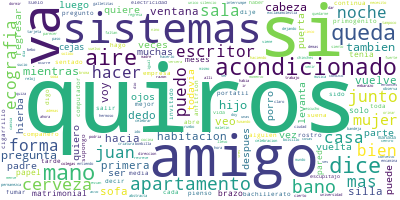

In [123]:
# Se importa la libreria necesaria
from wordcloud import WordCloud
# Creamos el objeto wordcloud
wordcloud = WordCloud(background_color="white",collocations=False)
# Generamos la nube de palabras
wordcloud.generate(texto_procesado)
# Visualizamos la nube de palabras
wordcloud.to_image()

# **GRACIAS!!!**